## 1.导入必要的工具包

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

import matplotlib.pyplot as plt
import seaborn as sns
#color = sns.color_palette()

%matplotlib inline

## 2.读取数据

In [2]:
# path to where the data lies
#dpath = './data/'
day_data = pd.read_csv("day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Insert hour.csv data set

In [3]:
hour_data = pd.read_csv("hour.csv")
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 3.显示数据基本信息

In [4]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# 判断数据是否有空
day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### 3.1显示数据各种信息

查看数据各特征的分布，以及特征之间是否存在相关关系等冗余。

我们可以借用可视化工具来直观感觉数据的分布。

在Python中，有很多数据可视化途径。
Matplotlib非常强大，也很复杂，不易于学习。 
Seaborn是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。

In [6]:
## 各属性的统计特性
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### 3.2单变量分布分析

#### 3.2.1直方图

绘制直方图，使用displot()函数，如下例子所示
其中第一项为所需统计数据

bins表示分多少份

kde为核密度估计，若为true则会画出类似概率密度的曲线

D:\software\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


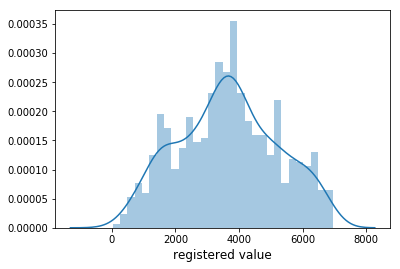

In [7]:
fig = plt.figure()
sns.distplot(day_data.registered.values, bins=30, kde=True)
plt.xlabel('registered value',fontsize = 12)
plt.show()

##### 3.2.1.1获取数据集行信息

In [8]:
print(day_data[0:3])

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   

    cnt  
0   985  
1   801  
2  1349  


#### 3.2.1.2获取数据集列信息

In [9]:
print(day_data.loc[0:,['instant','weekday']])

     instant  weekday
0          1        6
1          2        0
2          3        1
3          4        2
4          5        3
5          6        4
6          7        5
7          8        6
8          9        0
9         10        1
10        11        2
11        12        3
12        13        4
13        14        5
14        15        6
15        16        0
16        17        1
17        18        2
18        19        3
19        20        4
20        21        5
21        22        6
22        23        0
23        24        1
24        25        2
25        26        3
26        27        4
27        28        5
28        29        6
29        30        0
..       ...      ...
701      702        0
702      703        1
703      704        2
704      705        3
705      706        4
706      707        5
707      708        6
708      709        0
709      710        1
710      711        2
711      712        3
712      713        4
713      714        5
714      7

#### 3.2.2单个特征散点图

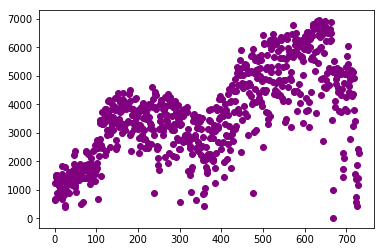

In [10]:
plt.scatter(range(day_data.shape[0]),day_data['registered'],color='purple')

#### 3.2.3根据条件筛选样本

In [11]:
day_data[(day_data.registered < 100) |(day_data.registered >5000)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
437,438,2012-03-13,1,1,3,0,2,1,1,0.565000,0.542929,0.617500,0.236950,762,5085,5847
438,439,2012-03-14,1,1,3,0,3,1,1,0.572500,0.548617,0.507083,0.115062,997,5315,6312
439,440,2012-03-15,1,1,3,0,4,1,1,0.557500,0.532825,0.579583,0.149883,1005,5187,6192
443,444,2012-03-19,1,1,3,0,1,1,1,0.545000,0.532821,0.728750,0.162317,982,5171,6153
444,445,2012-03-20,1,1,3,0,2,1,1,0.560833,0.538533,0.807917,0.121271,1051,5042,6093
445,446,2012-03-21,2,1,3,0,3,1,2,0.531667,0.513258,0.821250,0.089558,1122,5108,6230
446,447,2012-03-22,2,1,3,0,4,1,1,0.554167,0.531567,0.831250,0.117562,1334,5537,6871
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
452,453,2012-03-28,2,1,3,0,3,1,1,0.484167,0.470950,0.481250,0.291671,674,5024,5698
453,454,2012-03-29,2,1,3,0,4,1,1,0.494167,0.482304,0.439167,0.319650,834,5299,6133


#### 3.2.4使用countplot来画离散的数据

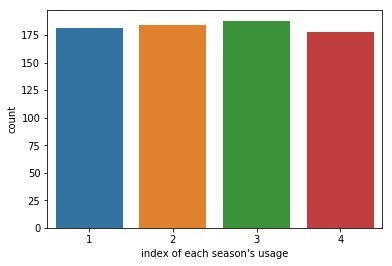

In [12]:
sns.countplot(day_data.season)
plt.xlabel('index of each season\'s usage');

### 3.3两两特征之间的相关性

In [13]:
#get the names of all the columns
cols=day_data.columns
print(cols)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


#### 3.3.1调用corr函数来计算两两特征之间的相关性

In [14]:
# Calculates pearson co-efficient for all combinations，通常认为相关系数大于0.5的为强相关
data_corr = day_data.corr().abs()
print(data_corr)

             instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412224  0.866025  0.496702  0.016145  0.000016   
season      0.412224  1.000000  0.001844  0.831440  0.010537  0.003080   
yr          0.866025  0.001844  1.000000  0.001792  0.007954  0.005461   
mnth        0.496702  0.831440  0.001792  1.000000  0.019191  0.009509   
holiday     0.016145  0.010537  0.007954  0.019191  1.000000  0.101960   
weekday     0.000016  0.003080  0.005461  0.009509  0.101960  1.000000   
workingday  0.004337  0.012485  0.002013  0.005901  0.253023  0.035790   
weathersit  0.021477  0.019211  0.048727  0.043528  0.034627  0.031087   
temp        0.150580  0.334315  0.047604  0.220205  0.028556  0.000170   
atemp       0.152638  0.342876  0.046106  0.227459  0.032507  0.007537   
hum         0.016375  0.205445  0.110651  0.222204  0.015937  0.052232   
windspeed   0.112620  0.229046  0.011817  0.207502  0.006292  0.014282   
casual      0.275255  0.210399  0.2485

#### 3.3.2通过热图打印相关性

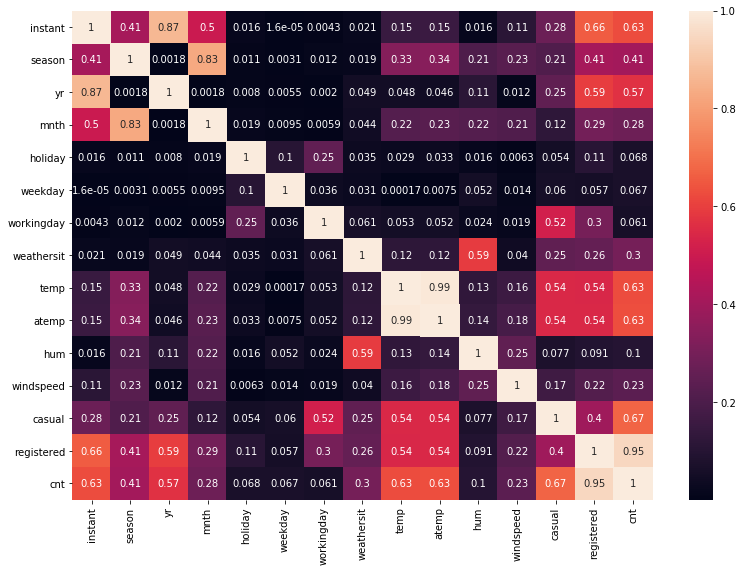

In [15]:
plt.subplots(figsize=(13, 9))
sns.heatmap(data_corr,annot=True)

# Mask unimportant features
sns.heatmap(data_corr, mask=data_corr < 1, cbar=False)

plt.savefig('house_coor.png' )
plt.show()

#### 3.3.3选择相关性>0.5的数据，并打印出来

In [16]:
data_corr.shape
data_corr.iloc[3,4]

0.01919089525339542

In [17]:
#Set the threshold to select only highly correlated attributes
threshold = 0.5
# List of pairs along with correlation above threshold
corr_list = []
#size = data.shape[1]
size = data_corr.shape[0]

#Search for the highly correlated pairs
for i in range(0, size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

weathersit and temp = 0.99
casual and registered = 0.95
instant and season = 0.87
dteday and yr = 0.83
windspeed and registered = 0.67
instant and casual = 0.66
temp and registered = 0.63
instant and registered = 0.63
weathersit and registered = 0.63
season and casual = 0.59
workingday and atemp = 0.59
season and registered = 0.57
temp and casual = 0.54
temp and windspeed = 0.54
weathersit and windspeed = 0.54
weathersit and casual = 0.54
weekday and windspeed = 0.52


#### 3.3.4画出两两特征之间的相关图

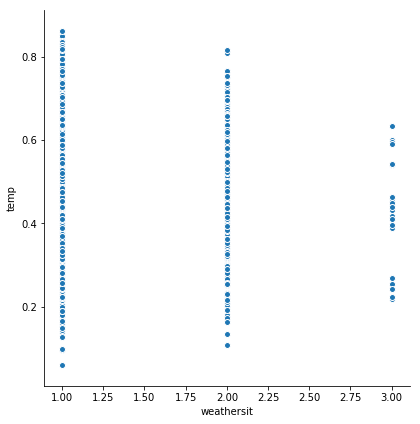

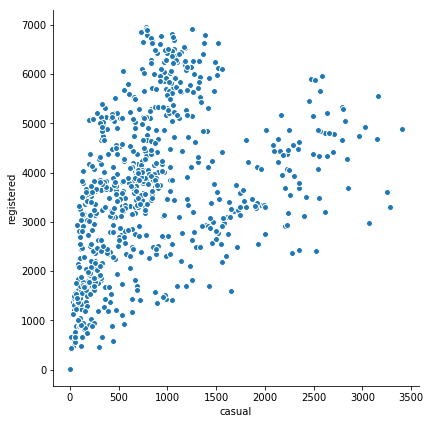

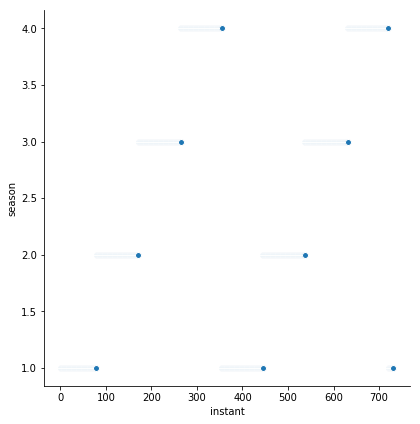

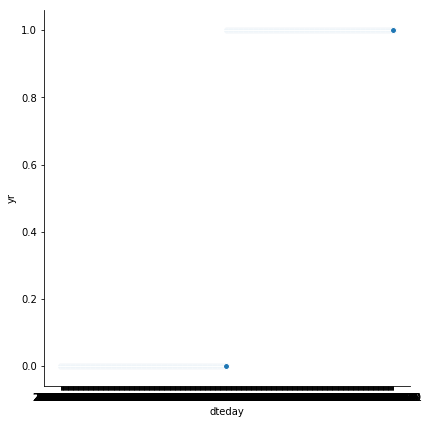

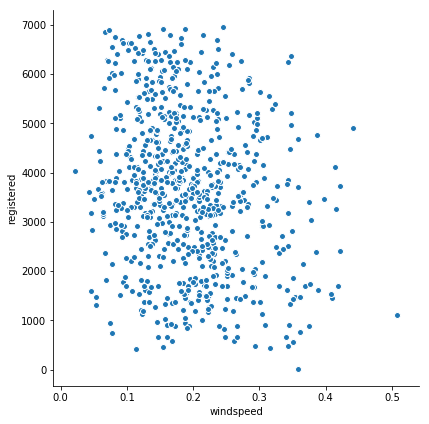

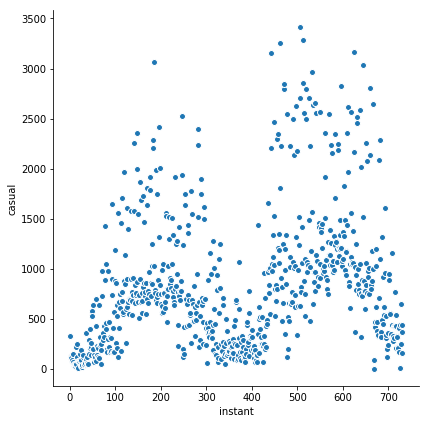

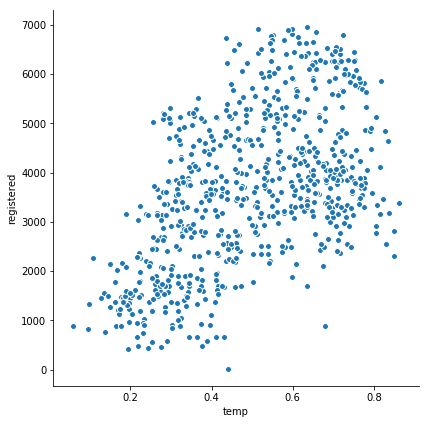

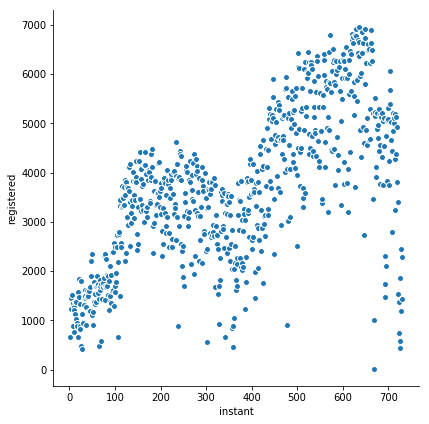

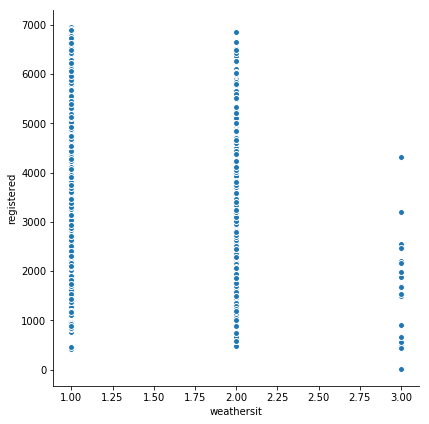

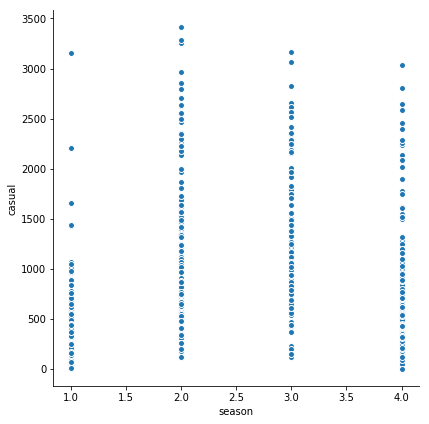

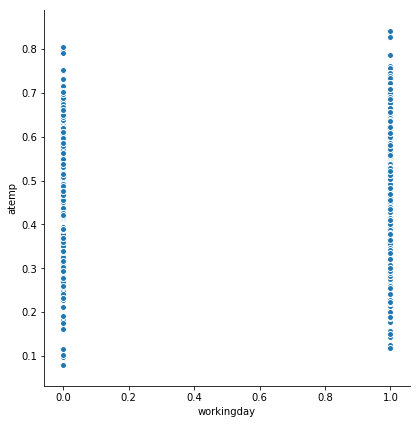

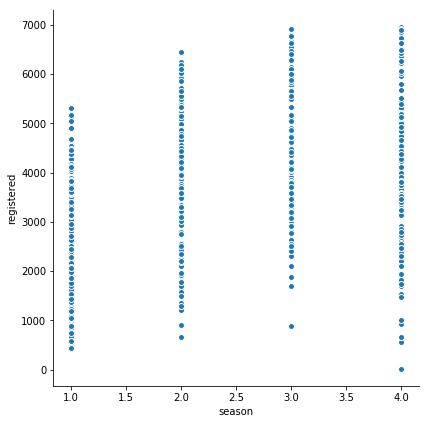

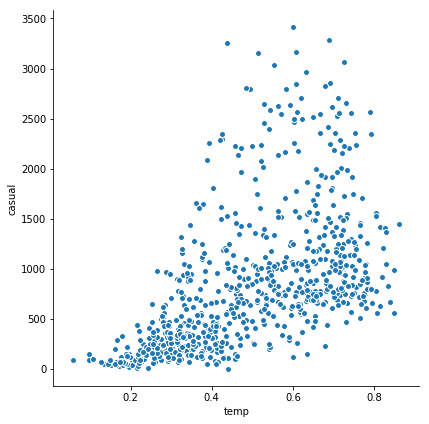

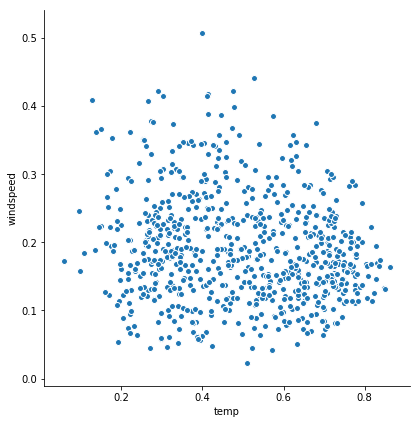

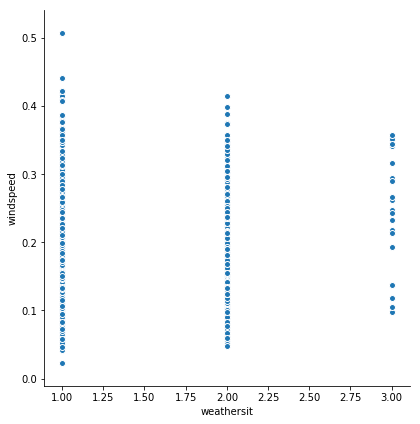

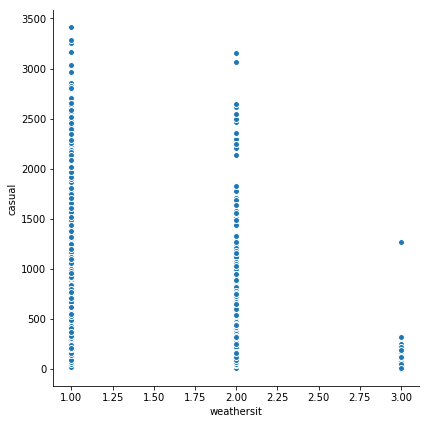

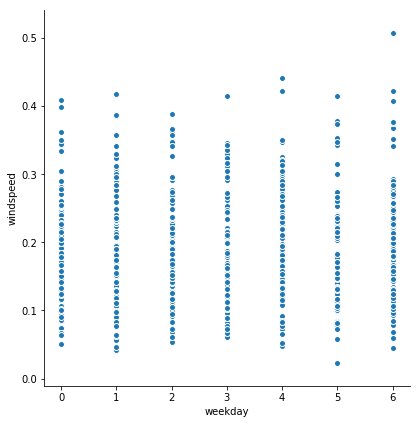

In [18]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(day_data, size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

## 4.数据准备

使用drop函数清除行，加axis = 1 参数删除列

In [19]:
# 从原始数据中分离输入特征x和输出y
y = day_data['cnt'].values
X = day_data.drop(['cnt','dteday'], axis = 1)

#用于后续显示权重系数对应的特征
columns = X.columns

当数据量比较大时，可用train_test_split从训练集中分出一部分做校验集；
样本数目较少时，建议用交叉验证
在线性回归中，留一交叉验证有简便计算方式，无需显式交叉验证

下面将训练数据分割成训练集和测试集，只是让大家对模型的训练误差、校验集上的测试误差估计、和测试集上的测试误差做个比较，实际任务中无需这么处理。

参数解释：

train_data：被划分的样本特征集

train_target：被划分的样本标签

test_size：如果是浮点数，在0-1之间，表示样本占比；如果是整数的话就是样本的数量

random_state：是随机数的种子。

随机数种子：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。但填0或不填，每次都会不一样。

随机数的产生取决于种子，随机数和种子之间的关系遵从以下两个规则：

种子不同，产生不同的随机数；种子相同，即使实例不同也产生相同的随机数。

In [20]:
#将数据分割训练数据与测试数据
from sklearn.model_selection import train_test_split

# 随机采样20%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)
X_train.shape

(584, 14)

## 5 数据预处理／特征工程

特征工程是实际任务中特别重要的环节。

scikit learn中提供的数据预处理功能：
http://scikit-learn.org/stable/modules/preprocessing.html
http://scikit-learn.org/stable/modules/classes.html#module- sklearn.feature_extraction

In [21]:
#发现各特征差异较大，需要进行数据标准化预处理
#标准化的目的在于避免原始特征值差异过大，导致训练得到的参数权重不归一，无法比较各特征的重要性

In [ ]:
fit_transform = fit + transform

In [22]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 分别初始化对特征和目标值的标准化器
ss_X = StandardScaler()
ss_y = StandardScaler()

# 分别对训练和测试数据的特征以及目标值进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

#对y做标准化不是必须
#对y标准化的好处是不同问题的w差异不太大，同时正则参数的范围也有限
y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test = ss_y.transform(y_test.reshape(-1, 1))

D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# 6.模型类型

## 6.1 缺省参数的线性回归

LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
fit_intercept:表示是否拟合截距项
normalize: 先进行减均值再除以模长
copy_x: 是否copy x,是否在计算过程中改变原来的x
n_jobs: 线程。缺省1，为单线程。 -1为使用所有线程。

In [23]:
# 线性回归
#class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
from sklearn.linear_model import LinearRegression

# 使用默认配置初始化
lr = LinearRegression()

# 训练模型参数
lr.fit(X_train, y_train)

# 预测
y_test_pred_lr = lr.predict(X_test)
y_train_pred_lr = lr.predict(X_train)


# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns), "coef":list((lr.coef_.T))})
fs.sort_values(by=['coef'],ascending=False)

,columns,coef
13,registered,[0.8084245823317608]
12,casual,[0.3512034262736612]
2,yr,[1.5156610811907962e-15]
3,mnth,[1.2078769205697617e-15]
8,temp,[2.43324729424016e-16]
10,hum,[8.481446892573362e-17]
7,weathersit,[-2.3264945669349228e-17]
11,windspeed,[-6.522672074854352e-17]
4,holiday,[-6.639280254753463e-17]
1,season,[-1.7769067045580877e-16]


### 6.1.1 模型评价

In [27]:
from sklearn.metrics import r2_score
# 使用r2_score评价模型在测试集和训练集上的性能，并输出评估结果
#测试集
print ('The r2 score of LinearRegression on test is', r2_score(y_test, y_test_pred_lr))
#训练集
print ('The r2 score of LinearRegression on train is', r2_score(y_train, y_train_pred_lr))

The r2 score of LinearRegression on test is 1.0
The r2 score of LinearRegression on train is 1.0


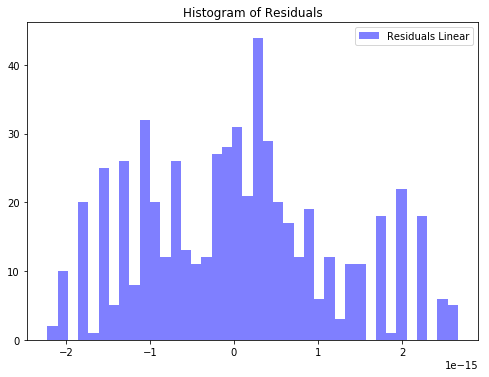

In [28]:
#在训练集上观察预测残差的分布，看是否符合模型假设：噪声为0均值的高斯噪声
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(y_train - y_train_pred_lr,bins=40, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 
ax.legend(loc='best');

D:\software\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


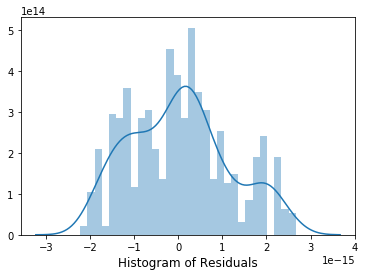

In [29]:
fig_res = plt.figure()
sns.distplot(y_train - y_train_pred_lr, bins=30, kde=True)
plt.xlabel('Histogram of Residuals',fontsize = 12)
plt.show()